In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

df = pd.read_csv('https://raw.githubusercontent.com/bhagi8289/mumbai_workshop/master/Vidarbh_MH_Rainfall_115_Years.csv')
df.sample(10)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
59,1960,38.8,0.0,41.0,6.7,8.2,195.2,378.5,199.9,114.8,78.5,1.1,2.4,1065.0
43,1944,4.5,59.4,64.8,1.6,2.7,96.6,470.4,370.6,213.2,67.4,16.5,0.0,1367.8
58,1959,13.6,1.2,0.4,11.8,6.2,178.0,467.9,377.3,469.9,79.4,0.5,0.1,1606.3
22,1923,1.0,6.7,30.6,3.4,2.3,21.4,402.9,201.1,260.1,11.0,0.1,0.7,941.3
111,2012,3.1,0.1,0.0,0.6,0.2,125.5,370.5,316.2,249.4,34.9,7.3,0.0,1107.7
1,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7,748.9
16,1917,0.9,78.5,20.6,11.5,48.9,234.9,350.1,200.3,328.5,120.9,1.7,0.0,1396.9
54,1955,15.5,0.3,2.3,6.8,5.0,274.7,278.4,371.8,244.6,169.1,0.2,0.0,1368.7
90,1991,6.3,1.6,4.6,4.7,3.0,168.9,348.0,255.4,23.0,9.6,12.1,1.5,838.7
24,1925,0.0,0.0,7.3,5.4,28.0,130.3,293.9,307.2,77.4,21.8,61.5,8.4,941.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2e8460630>,
      dtype=object)

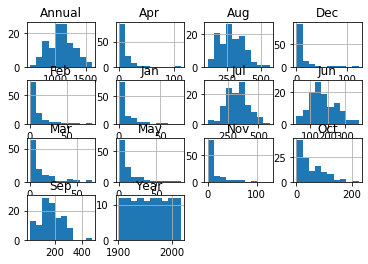

In [2]:
df.hist()

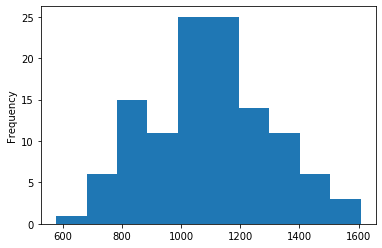

In [3]:
df['Annual'].plot.hist()

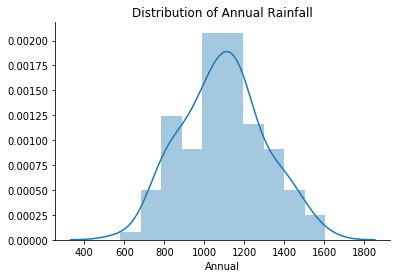

In [0]:
sns.distplot(df['Annual'])
plt.title("Distribution of Annual Rainfall")
sns.despine()

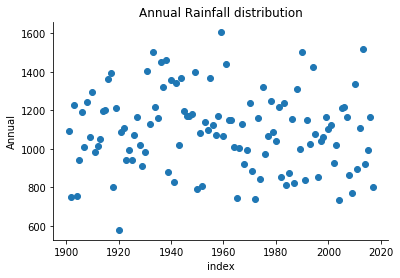

In [6]:
plt.scatter(df['Year'], df['Annual'].values)
plt.xlabel('index')
plt.ylabel('Annual')
plt.title("Annual Rainfall distribution")
sns.despine()

In [7]:
print("Skewness: %f" % df['Annual'].skew())
print("Kurtosis: %f" % df['Annual'].kurt())

Skewness: 0.102160
Kurtosis: -0.320278


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


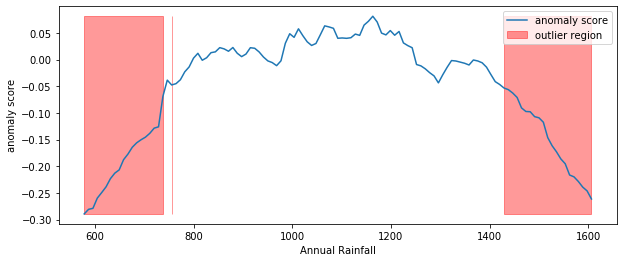

In [8]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Annual'].values.reshape(-1, 1))
xx = np.linspace(df['Annual'].min(), df['Annual'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Annual Rainfall')
plt.show();

In [0]:
def covariance_matrix(X):
    m, n = X.shape 
    tmp_mat = np.zeros((n, n))
    mu = X.mean(axis=0)
    for i in range(m):
        tmp_mat += np.outer(X[i] - mu, X[i] - mu)
    return tmp_mat / m

In [0]:
covariance_matrix(X_train)

array([[5861.01346629, -204.80755935, 1375.98394112, -249.65189934],
       [-204.80755935, 8629.88432756,   37.48404631, 1828.07543794],
       [1375.98394112,   37.48404631, 7398.53161663, -352.7001629 ],
       [-249.65189934, 1828.07543794, -352.7001629 , 6411.59377749]])

In [0]:
X = df[['Jun','Jul','Aug','Sep']]
X_train = X.to_numpy()


In [11]:
X_train

array([[129.7, 295.3, 368.8, 123.4],
       [ 38. , 270.7, 204.7, 150.9],
       [121.2, 475.5, 325.5, 154.8],
       [148.9, 158.3, 151.8, 196.9],
       [ 81. , 254.5, 216.3, 321.3],
       [328.1, 350.4, 325.8, 113.3],
       [181.4, 309.7, 332.6,  59.7],
       [232. , 355.2, 398.4, 205.9],
       [157.1, 405. , 176. , 160.3],
       [289.1, 297.4, 278.7, 300.3],
       [218. , 205.9, 292.3, 176.1],
       [ 54.2, 364.5, 391.9, 117. ],
       [199.8, 378.3, 244.3, 137.2],
       [239.5, 341.2, 245.6, 266.6],
       [190.2, 311. , 229.6, 195.2],
       [257. , 345.3, 306.2, 253.1],
       [234.9, 350.1, 200.3, 328.5],
       [278.3, 168. , 174.5,  55.5],
       [325.6, 280.3, 249.8, 103.6],
       [101.8, 237.8, 111.7,  83.3],
       [283.9, 293. , 292. , 182.3],
       [206.1, 361.7, 116.5, 295.3],
       [ 21.4, 402.9, 201.1, 260.1],
       [ 43.8, 308.3, 220.6, 217.3],
       [130.3, 293.9, 307.2,  77.4],
       [ 31.8, 330.6, 420. , 109.9],
       [280.2, 414.7, 220.1,  97.7],
 

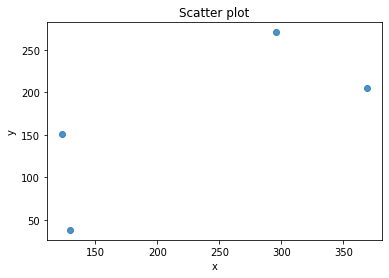

In [12]:
from sklearn.decomposition import PCA

pca = PCA(2)

x_pca = pca.fit_transform(X_train)

x_pca = pd.DataFrame(x_pca)

x_pca.columns=['PC1','PC2']



# Plot

import matplotlib.pyplot as plt

plt.scatter(X_train[0], X_train[1], alpha=0.8)

plt.title('Scatter plot')

plt.xlabel('x')

plt.ylabel('y')

plt.show()

Source: https://towardsdatascience.com/wondering-how-to-build-an-anomaly-detection-model-87d28e50309

In [13]:
X.mean()

Jun    173.288889
Jul    330.142735
Aug    284.139316
Sep    175.536752
dtype: float64

In [14]:
X.cov()

,Jun,Jul,Aug,Sep
Jun,5911.539444,-206.573142,1387.845872,-251.804071
Jul,-206.573142,8704.279882,37.807185,1843.834709
Aug,1387.845872,37.807185,7462.312062,-355.740682
Sep,-251.804071,1843.834709,-355.740682,6466.866138


In [0]:
cov_mat = covariance_matrix(X_train)

In [17]:
len(cov_mat)

4

In [0]:
cov_mat_inv = np.linalg.pinv(cov_mat)
cov_mat_det = np.linalg.det(cov_mat)

In [0]:
def multi_gauss(x):
    n = len(cov_mat)
    return (np.exp(-0.5 * np.dot(x, np.dot(cov_mat_inv, x.T))) 
            / (2. * np.pi)**(n/2.) 
            / np.sqrt(cov_mat_det))


In [21]:
p = multi_gauss(X.loc[0].values)
p

1.4591702930086818e-16

**if p value is less than a threshold epsilon, then it is an anomaly.
The value of epsilon is typically 0.02 but can also be estimated if training data is available.**